# AN, SIA, SIDIS, AUTsinphiS Analysis

In [1]:
import sys
import os
import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline
from tools.tools import save,load,lprint
from tools.config import load_config, conf
from tools.bar import BAR
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

In [2]:
load_config('input_an_aUTspS.py')
conf['resman']=RESMAN()
conf['parman']=PARMAN()
conf['resman'].get_residuals(conf['parman'].par);

loading AN data sets 2003022

## Load AN data from files

In [3]:
ALL=pd.concat([pd.DataFrame(conf['resman'].ANres.tabs[idx]) \
              for idx in conf['resman'].ANres.tabs.keys()])

ALL.columns

Index([          u'N',       u'Shift',       u'alpha',         u'col',
            u'hadron',         u'obs',          u'pT', u'r-residuals',
         u'residuals',          u'rs',       u'shift',  u'stat_err_u',
         u'sys_err_u',      u'target',         u'thy',       u'value',
                u'xF'],
      dtype='object')

## Organize data
Organize data from different collaborations with different observables

In [4]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: BRAHMS, Observerable: AN, Points: 18
Collaboration: STAR, Observerable: AN, Points: 42


## Plot results 
Plot the data vs. theory curves

In [5]:
data = {}

for key, value in conf['resman'].ANres.tabs.iteritems():
    data[key] = pd.DataFrame(value)

In [6]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [7]:
ALL=pd.concat([pd.DataFrame(conf['resman'].ANres.tabs[idx]) \
              for idx in conf['resman'].ANres.tabs.keys()])

ALL.columns

Index([          u'N',       u'Shift',       u'alpha',         u'col',
            u'hadron',         u'obs',          u'pT', u'r-residuals',
         u'residuals',          u'rs',       u'shift',  u'stat_err_u',
         u'sys_err_u',      u'target',         u'thy',       u'value',
                u'xF'],
      dtype='object')

In [8]:
def plotBRAHMS(data1,data2,label1='dataset 1'):

    data_sub1 = data1.query('xF > 0')
    data_sub2 = data2.query('xF > 0')
    
    plt.errorbar(data_sub1.xF, data_sub1.value, data_sub1.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
    plt.plot(data_sub1.xF, data_sub1.thy, linestyle='-', color='red')
    
    plt.errorbar(data_sub2.xF, data_sub2.value, data_sub2.alpha, 
                    marker='o', linestyle='', color='blue', label=label1)
    plt.plot(data_sub2.xF, data_sub2.thy, linestyle='-', color='blue')
    
    #plt.errorbar(data_sub3.xF, data_sub3.value, data_sub3.alpha, 
    #               marker='o', linestyle='', color='red', label=label3)
    #plt.plot(data_sub3.xF, data_sub3.thy, linestyle='-', color='red')
    
    #plt.errorbar(data_sub4.xF, data_sub4.value, data_sub4.alpha, 
    #                marker='o', linestyle='', color='blue', label=label1)
    #plt.plot(data_sub4.xF, data_sub4.thy, linestyle='-', color='blue')
    
    
    plt.xlim([0.1, 0.35])
    plt.xlabel('$x_F$')
    plt.title(label1,loc='left')
        
    plt.tight_layout()

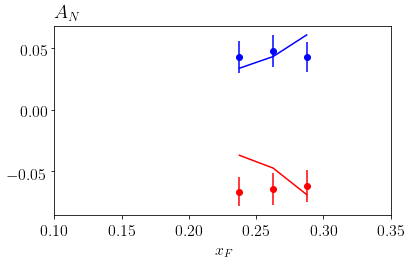

In [9]:
plotBRAHMS(data[1000],data[1002],'$A_{N}$')

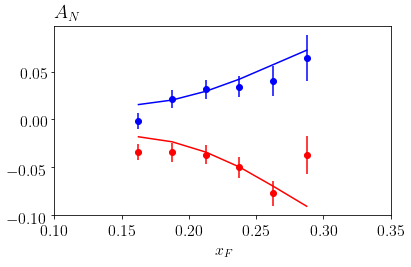

In [10]:
plotBRAHMS(data[1001],data[1003],'$A_{N}$')

In [11]:
def plotSTAR(data1,data2,data3,data4,label1='dataset 1'):

    data = [data1,data2,data3,data4]
    
    plt.figure(figsize=(10,10))
    
    for k in range(len(data)):
    
        plt.subplot(2, 2, k+1)
    
        data_sub = data[k].query('xF > 0')
    
        plt.errorbar(data_sub.xF, data_sub.value, data_sub.alpha, 
                    marker='o', linestyle='', color='red', label=label1)
        plt.plot(data_sub.xF, data_sub.thy, linestyle='-', color='red')
    
    
        plt.xlim([0.1, 0.8])
        plt.xlabel('$x_F$')
        plt.title(label1,loc='left')
        
    plt.tight_layout()

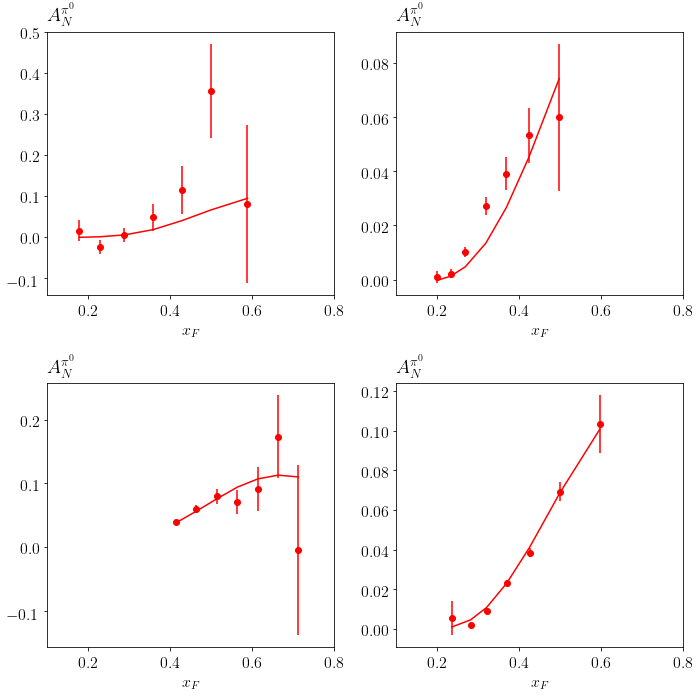

In [12]:
plotSTAR(data[2000],data[2001],data[2002],data[2003],'$A_{N}^{\pi^0}$')

In [13]:
Z1=10**np.linspace(-4,-2)
Z2=np.linspace(0.0101,1)
Z=np.append(Z1,Z2)
Q2=2
Hpipu=[conf['collinspi'].get_C(z,Q2)[1] for z in Z]
Hpipd=[conf['collinspi'].get_C(z,Q2)[3] for z in Z]
print conf['params']['Htildepi']['u N0 1']['value']
print conf['Htildepi'].get_C(0.3,2)[1]

-6.33222
-0.04084214493919271


In [14]:
X1=10**np.linspace(-4,-2)
X2=np.linspace(0.0101,1)
X=np.append(X1,X2)
Q2=2.
TRu= [conf['transversity'].get_C(x,Q2)[1] for x in X]
TRd= [conf['transversity'].get_C(x,Q2)[3] for x in X]

In [15]:
Z1=10**np.linspace(-4,-2)
Z2=np.linspace(0.0101,1)
Z=np.append(Z1,Z2)
Q2=2
Htildepipu=[conf['Htildepi'].get_C(z,Q2)[1] for z in Z]
Htildepipd=[conf['Htildepi'].get_C(z,Q2)[3] for z in Z]
print conf['params']['Htildepi']['u N0 1']['value']
print conf['Htildepi'].get_C(0.3,2)[1]

-6.33222
-0.04084214493919271


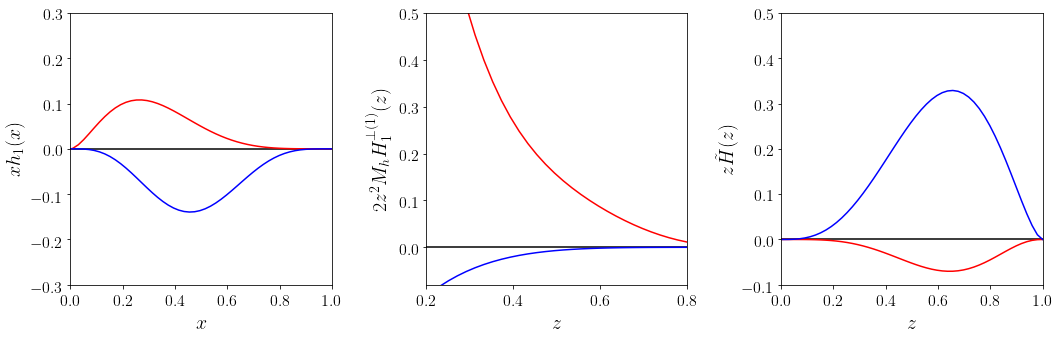

In [16]:
nrows,ncols=1,3
py.figure(figsize=(ncols*5,nrows*5))

ax=py.subplot(nrows,ncols,1)
#ax.fill_between(X,X*(TR['f'][1]-TR['df'][1]),X*(TR['f'][1]+TR['df'][1]),color='r',alpha=0.5,label="u")
#ax.fill_between(X,X*(TR['f'][3]-TR['df'][3]),X*(TR['f'][3]+TR['df'][3]),color='b',alpha=0.5,label="d")
ax.plot(X,X*0,'black')
ax.plot(X,X*TRu,'r')
ax.plot(X,X*TRd,'b')
ax.set_ylabel(r'$x h_{1}(x)$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.set_ylim(-0.3,0.3)
ax.set_xlim(0.,1)
#xmin=np.amin(tab['x'])
#xmax=np.amax(tab['x'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([xmin,xmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)

ax=py.subplot(nrows,ncols,2)
#ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5,label="fav")
#ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5,label="unfav")
ax.plot(Z,Z*0,'black')
ax.plot(Z,Z*Hpipu,'r')
ax.plot(Z,Z*0.135*Hpipd,'b')
#ax.plot(Z,2*Z**2*0.135*Hpizu,'green')
#ax.plot(Z,2*Z**2*0.135*Hpizd,'purple')
ax.set_ylabel(r'$2z^2M_h H_1^{\perp (1)}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-0.08,0.5)
ax.set_xlim(0.2,0.8)
#zmin=np.amin(tab['z'])
#zmax=np.amax(tab['z'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)

ax=py.subplot(nrows,ncols,3)
#ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5,label="fav")
#ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5,label="unfav")
ax.plot(Z,Z*0,'black')
ax.plot(Z,Z*Htildepipu,'r')
ax.plot(Z,Z*Htildepipd,'b')
ax.set_ylabel(r'$z\tilde{H}(z)$',size=20)
ax.set_xlabel(r'$z$',size=20)
ax.set_ylim(-0.1,0.5)
ax.set_xlim(0,1)
#zmin=np.amin(tab['z'])
#zmax=np.amax(tab['z'])
#ymin,ymax=ax.get_ylim()
#dy=ymax-ymin
#ax.plot([zmin,zmax],[ymin+dy*0.1,ymin+dy*0.1],'g-')
ax.legend(fontsize=20,frameon=False)



py.tight_layout()